# Whitebox NN for KMeans

    inputRows  idleTime  backTime  exeTime  exeAdded  exeRemoved  numTasks0  \
0    10000000        10         8       75         5           0          1   
1    10000000         8        12       72         4           1          1   
2    10000000         6         8       82         5           1          1   
3    10000000         4         6      102        10           5          1   
4    10000000         8         4       88         9           4          1   
5    10000000         7         7      169        14          12          1   
6    10000000        12        12      178        10           7          1   
7    10000000         9        10      171        11           8          1   
8    10000000        15        15      178        10           8          1   
9    10000000        11         9      149         9           6          1   
10   15000000        13        11      124         6           0          1   
11   15000000        11        13      123         6

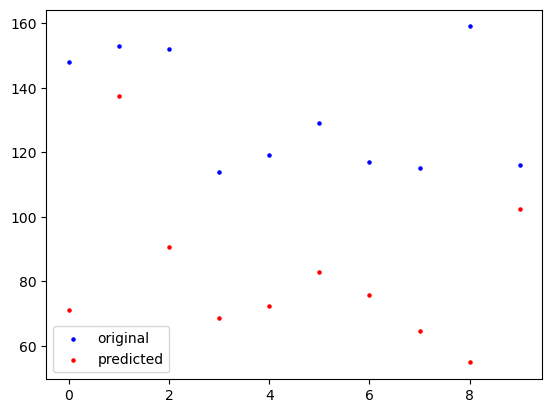

In [1]:
# This notebook is based on the methodology described in:
# Tariq, H., & Das, O. (2023). Execution Time Prediction Model that Considers Dynamic Allocation of Spark Executors.
# In: Gilly, K., Thomas, N. (eds) Computer Performance Engineering. EPEW 2023. LNCS, vol 14231. Springer, Cham.
# DOI: https://doi.org/10.1007/978-3-031-43185-2_23

import os, sys
import pandas as pd
import numpy as np
data = pd.read_csv('kmeansdata.csv')
print(data)

import sklearn
from sklearn import model_selection
from sklearn.neural_network import MLPRegressor
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt

#training set and test set
train_set=data[data[['inputRows']].isin([5000000, 10000000, 15000000]).any(axis=1)]
test_set=data[data[['inputRows']].isin([20000000]).any(axis=1)]

#print("TRAIN SET", train_set)
#print("TEST SET", test_set)

#train set: x,y split
x_train_set = train_set[['inputRows', 'idleTime', 'backTime','numTasks0','median0','max0','numTasks1','median1','max1','numTasks2','median2','max2','numTasks3','median3','max3','numTasks4','median4','max4','numTasks5','median5','max5','numTasks6','median6','max6','numTasks7','median7','max7','numTasks8','median8','max8','numTasks9','median9','max9','numTasks10','median10','max10','numTasks11','median11','max11','numTasks12','median12','max12']]
y_train_set = train_set['exeTime']


#test set: x,y split
x_test_set = test_set[['inputRows', 'idleTime', 'backTime','numTasks0','median0','max0','numTasks1','median1','max1','numTasks2','median2','max2','numTasks3','median3','max3','numTasks4','median4','max4','numTasks5','median5','max5','numTasks6','median6','max6','numTasks7','median7','max7','numTasks8','median8','max8','numTasks9','median9','max9','numTasks10','median10','max10','numTasks11','median11','max11','numTasks12','median12','max12']]
y_test_set = test_set['exeTime']

print ("\ntrain/test split lengths ", len(x_train_set),len(x_test_set),len(y_train_set),len(y_test_set))

#normalizing training input data 
scaler = StandardScaler()
train_x_scaled = scaler.fit_transform(x_train_set)
test_x_scaled = scaler.fit_transform(x_test_set)

#regressor parameters 
mlp = MLPRegressor(hidden_layer_sizes=(25,25), max_iter=10000, alpha= 0.001, 
                   solver= 'adam', activation='relu', batch_size= 1, 
                   learning_rate= 'adaptive', learning_rate_init= 0.01, 
                   beta_1= 0.9)

#fit training data 
training = mlp.fit(train_x_scaled, y_train_set)
print("\nconfiguration: ", training)

#prediction
y_pred = mlp.predict(test_x_scaled)

actual = np.array(y_test_set)
pred = np.array(y_pred)

print ("\nprediction: ", pred) #array_output
print ("\nactual: ", actual)

mape = np.mean(np.abs((actual - pred)/actual)) * 100

print("mape = ", mape)
print("built-in function mape: ", mean_absolute_percentage_error(actual, pred))

# plot: predicted vs actual 
x_ax = range(len(y_test_set))
plt.scatter(x_ax, y_test_set, s=5, color="blue", label="original")
plt.scatter(x_ax, pred, s=5, color="red", label="predicted")
plt.legend()
plt.show()